In [162]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [163]:
values_df = pd.read_csv("values.csv", sep=",")
# randomize data
#values_df = values_df.reindex(np.random.permutation(values_df.index))

values_df

,Unnamed: 0,From,To,Value
0,0,central_aws,central_aws,1.0000
1,1,frankfurt_aws,central_aws,0.4266
2,2,frankfurt_google,central_aws,0.0000
3,3,ireland_aws,central_aws,0.4508
4,4,london_aws,central_aws,0.4372
5,5,london_google,central_aws,0.0000
6,6,mumbai_aws,central_aws,0.2742
7,7,mumbai_google,central_aws,0.0000
8,8,northcalifornia_aws,central_aws,0.4558
9,9,northvirginia_aws,central_aws,0.0000


In [164]:
df = values_df.pivot(index="From", columns="To", values="Value")
trX = df.values
trX.shape

(24, 24)

In [166]:
trX

array([[1.    , 0.4151, 0.    , 0.4486, 0.3986, 0.    , 0.2769, 0.    ,
        0.4286, 0.6295, 0.    , 0.574 , 0.4742, 0.    , 0.4292, 0.3835,
        0.    , 0.2987, 0.2504, 0.    , 0.2618, 0.    , 0.3349, 0.    ],
       [0.4266, 1.    , 0.9096, 0.6227, 0.6694, 0.6053, 0.3891, 0.0759,
        0.3361, 0.4606, 0.4343, 0.4404, 0.3303, 0.3475, 0.6708, 0.2424,
        0.2441, 0.1932, 0.3299, 0.1388, 0.1598, 0.1646, 0.2187, 0.2127],
       [0.    , 0.814 , 1.    , 0.    , 0.5994, 0.8098, 0.2038, 0.0676,
        0.    , 0.4174, 0.4246, 0.    , 0.3326, 0.3586, 0.    , 0.2268,
        0.2296, 0.    , 0.1416, 0.1572, 0.1466, 0.1733, 0.2068, 0.2424],
       [0.4508, 0.5834, 0.    , 1.    , 0.5836, 0.    , 0.3752, 0.    ,
        0.3378, 0.4298, 0.    , 0.4608, 0.3843, 0.    , 0.5272, 0.2977,
        0.    , 0.1955, 0.3098, 0.    , 0.1774, 0.    , 0.2447, 0.    ],
       [0.4372, 0.655 , 0.6205, 0.7478, 1.    , 0.9988, 0.3836, 0.0829,
        0.3479, 0.4674, 0.4506, 0.4544, 0.3667, 0.3683, 0.71

In [167]:
df

To,central_aws,frankfurt_aws,frankfurt_google,ireland_aws,london_aws,london_google,mumbai_aws,mumbai_google,northcalifornia_aws,northvirginia_aws,...,paris_aws,saopaulo_aws,saopaulo_google,seoul_aws,singapore_aws,singapore_google,sydney_aws,sydney_google,tokyo_aws,tokyo_google
From,,,,,,,,,,,,,,,,,,,,,
central_aws,1.0000,0.4151,0.0000,0.4486,0.3986,0.0000,0.2769,0.0000,0.4286,0.6295,...,0.4292,0.3835,0.0000,0.2987,0.2504,0.0000,0.2618,0.0000,0.3349,0.0000
frankfurt_aws,0.4266,1.0000,0.9096,0.6227,0.6694,0.6053,0.3891,0.0759,0.3361,0.4606,...,0.6708,0.2424,0.2441,0.1932,0.3299,0.1388,0.1598,0.1646,0.2187,0.2127
frankfurt_google,0.0000,0.8140,1.0000,0.0000,0.5994,0.8098,0.2038,0.0676,0.0000,0.4174,...,0.0000,0.2268,0.2296,0.0000,0.1416,0.1572,0.1466,0.1733,0.2068,0.2424
ireland_aws,0.4508,0.5834,0.0000,1.0000,0.5836,0.0000,0.3752,0.0000,0.3378,0.4298,...,0.5272,0.2977,0.0000,0.1955,0.3098,0.0000,0.1774,0.0000,0.2447,0.0000
london_aws,0.4372,0.6550,0.6205,0.7478,1.0000,0.9988,0.3836,0.0829,0.3479,0.4674,...,0.7122,0.2568,0.2670,0.1904,0.3316,0.1690,0.1660,0.1862,0.2328,0.2530
london_google,0.0000,0.5166,0.5426,0.0000,0.9433,1.0000,0.2038,0.0892,0.0000,0.4402,...,0.0000,0.2428,0.2458,0.0000,0.1587,0.1730,0.1610,0.1927,0.2204,0.2418
mumbai_aws,0.2742,0.3951,0.2198,0.3800,0.3910,0.2220,1.0000,0.9528,0.2050,0.2954,...,0.4082,0.1106,0.0588,0.3388,0.4830,0.4674,0.2008,0.3230,0.3584,0.3698
mumbai_google,0.0000,0.0569,0.0772,0.0000,0.0730,0.0912,0.9186,1.0000,0.0000,0.1574,...,0.0000,0.0154,0.0142,0.0000,0.4843,0.4852,0.3114,0.3688,0.3406,0.3650
northcalifornia_aws,0.4558,0.3475,0.0000,0.3469,0.3638,0.0000,0.2098,0.0000,1.0000,0.4918,...,0.3695,0.2769,0.0000,0.3618,0.3119,0.0000,0.3456,0.0000,0.4026,0.0000


In [168]:
visible_units = 24
hidden_units = 8
vb = tf.placeholder('float', [visible_units])
hb = tf.placeholder('float', [hidden_units])
W = tf.placeholder('float', [visible_units, hidden_units])

In [169]:
# 1. Forward pass
v0 =tf.placeholder('float', [None, visible_units])
_h0 = tf.nn.sigmoid(tf.matmul(v0, W) + hb)
h0 = tf.nn.relu(tf.sign(_h0 - tf.random_uniform(tf.shape(_h0))))

# 2. Backward pass (reconstruction)
_v1 = tf.nn.sigmoid(tf.matmul(h0, tf.transpose(W)) + vb)
v1 = tf.nn.relu(tf.sign(_v1 - tf.random_uniform(tf.shape(_v1))))
h1 = tf.nn.sigmoid(tf.matmul(v1, W) + hb)

In [170]:
# learning rate
alpha = 0.5
# gradients
w_pos_grad = tf.matmul(tf.transpose(v0),h0)
w_neg_grad = tf.matmul(tf.transpose(v1),h1)
# Contrastive divergence
CD = (w_pos_grad - w_neg_grad)/tf.to_float(tf.shape(v0)[0])
# update weights and biases
update_w = W + alpha*CD
update_vb = vb + alpha * tf.reduce_mean(v0-v1, 0) 
update_hb = hb + alpha * tf.reduce_mean(h0-h1, 0)

In [171]:
# error function set as Mean Absolute Error Function
error = v0 - v1
errors_sum = tf.reduce_mean(error*error)

In [172]:
# initialize variables
curr_w = np.zeros([visible_units, hidden_units], np.float32)
curr_vb = np.zeros([visible_units], np.float32)
curr_hb = np.zeros([hidden_units], np.float32)

prev_w = np.zeros([visible_units, hidden_units], np.float32)
prev_vb = np.zeros([visible_units], np.float32)
prev_hb = np.zeros([hidden_units], np.float32)


sess = tf.Session()
sess.run(tf.global_variables_initializer())

0.29363406
0.2767278
0.2504483
0.24044238
0.26083994
0.25517014
0.27545658
0.22517988
0.24712223
0.23928854
0.23968124
0.22742534
0.22209655
0.21851635
0.21354795
0.20601352
0.21865138
0.19688264
0.22387187
0.21995905
0.20030694
0.21577364
0.20980348
0.20242572
0.21827364
0.21646321
0.20206007
0.22233088
0.20262153
0.19697604
0.19188507
0.21530972
0.20253852
0.20894445
0.22798437
0.21611772
0.19450139
0.20856008
0.19637603
0.20125937
0.1905427
0.18672916
0.18779376
0.2062948
0.18358956
0.18120034
0.2031632
0.19573821
0.20648472
0.20773126
0.18587917
0.21960695
0.2054472
0.19986215
0.21129721
0.20126216
0.19777222
0.1974802
0.1857462
0.20601214
0.19037813
0.2113955
0.17797916
0.18475834
0.20285
0.17830037
0.20065348
0.20745938
0.19249445
0.20310381
0.19983715
0.19209236
0.21221286
0.20487535
0.20612952
0.20486146
0.20773333
0.19986424
0.20006078
0.19134372
0.19509272
0.1963854
0.19575243
0.19784339
0.1920462
0.1940059
0.18474652
0.2050368
0.1703781
0.1898788
0.19387847
0.19526666
0.1898

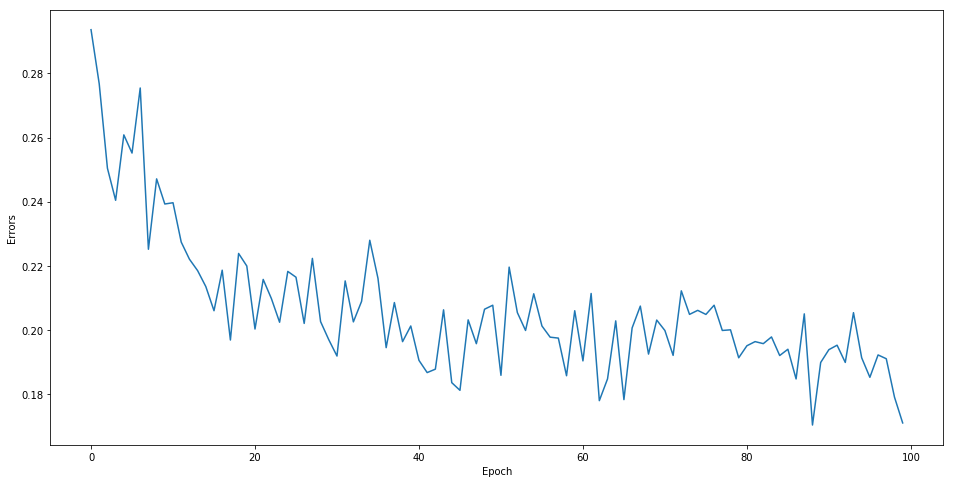

In [173]:
epochs = 100
batch_size = 4
errors = []
for epoch in range(epochs):
    for start, end in zip(range(0, len(trX), batch_size), range (batch_size, len(trX), batch_size)):
        data = trX[start:end]
        curr_w = sess.run(update_w, feed_dict={v0: data, W: prev_w, vb:prev_vb, hb:prev_hb})
        curr_hb = sess.run(update_hb, feed_dict={v0: data, W: prev_w, vb:prev_vb, hb:prev_hb})
        curr_vb = sess.run(update_vb, feed_dict={v0: data, W: prev_w, vb:prev_vb, hb:prev_hb})
    
        prev_w = curr_w
        prev_vb = curr_vb
        prev_hb = curr_hb
        
    errors.append(sess.run(errors_sum, feed_dict={v0: trX, W: curr_w, vb: curr_vb, hb: curr_hb}))
    print(errors[-1])

plt.plot(errors)
plt.xlabel('Epoch')
plt.ylabel('Errors')
plt.show()

In [174]:
#selecting input
input = trX[0].reshape(1,-1)
input[0]

array([1.    , 0.4151, 0.    , 0.4486, 0.3986, 0.    , 0.2769, 0.    ,
       0.4286, 0.6295, 0.    , 0.574 , 0.4742, 0.    , 0.4292, 0.3835,
       0.    , 0.2987, 0.2504, 0.    , 0.2618, 0.    , 0.3349, 0.    ])

In [175]:
# Feeding in the datacenter and reconstructing the input
hh0 = tf.nn.sigmoid(tf.matmul(v0,W) + hb)
vv1 = tf.nn.sigmoid(tf.matmul(hh0, tf.transpose(W))+vb)
feed = sess.run(hh0, feed_dict={v0:input,W:curr_w,hb:curr_hb})
rec = sess.run(vv1, feed_dict={hh0:feed, W:curr_w, vb:curr_vb})

In [176]:
rec[0]

array([0.55480826, 0.3965585 , 0.07127672, 0.53083813, 0.53291714,
       0.0201199 , 0.2859853 , 0.01165831, 0.48821092, 0.47507596,
       0.02912249, 0.631548  , 0.24460077, 0.02667228, 0.38173428,
       0.2601876 , 0.0165304 , 0.46194586, 0.37267178, 0.00528917,
       0.21537572, 0.01316166, 0.37822506, 0.02450854], dtype=float32)

In [177]:
# list all the recommended dc in descending order
datacenter_df = pd.read_csv('Datacenters.csv',sep=',')
datacenter_df.head()

,DataCenterId,Name
0,0,central_aws
1,1,frankfurt_aws
2,2,frankfurt_google
3,3,ireland_aws
4,4,london_aws


In [178]:
df_mock = datacenter_df.assign(RecommendationScore=rec[0])
df_mock.sort_values(['RecommendationScore'], ascending=False)

,DataCenterId,Name,RecommendationScore
11,11,ohio_aws,0.631548
0,0,central_aws,0.554808
4,4,london_aws,0.532917
3,3,ireland_aws,0.530838
8,8,northcalifornia_aws,0.488211
9,9,northvirginia_aws,0.475076
17,17,seoul_aws,0.461946
1,1,frankfurt_aws,0.396558
14,14,paris_aws,0.381734
22,22,tokyo_aws,0.378225


In [25]:
df_mock = datacenter_df[df_mock['Name'].isin(values_df.columns)]
df_mock = datacenter_df.assign(RecommendationScore=rec[0])
df_mock.sort_values(['RecommendationScore'], ascending=False)

,DataCenterId,Name,RecommendationScore
4,4,london_aws,0.716791
1,1,frankfurt_aws,0.606807
14,14,paris_aws,0.601909
5,5,london_google,0.592862
2,2,frankfurt_google,0.505618
10,10,northvirginia_google,0.499322
18,18,singapore_aws,0.441324
6,6,mumbai_aws,0.385559
9,9,northvirginia_aws,0.365254
3,3,ireland_aws,0.347111


In [107]:
prev_w

array([[-0.848394  , -0.9462479 ,  1.456084  , -0.6242631 , -0.3689344 ,
        -0.99426264, -0.68724   , -3.3351161 ],
       [-0.8025334 , -0.83906364, -0.6903543 , -1.0720041 , -0.5372855 ,
        -0.84587276, -0.83790594, -0.6213941 ],
       [-0.906363  , -0.87763035, -3.461344  , -0.79708564, -0.5265902 ,
        -0.92724556, -0.7421442 ,  0.14221789],
       [-0.97398174, -1.2460415 ,  0.04553863, -0.8436854 , -0.4715334 ,
        -1.5132608 , -0.9818517 , -3.961344  ],
       [-1.1901635 , -1.01936   , -1.0102628 , -1.1449157 , -0.41590428,
        -1.0286233 , -0.8851782 , -0.83656186],
       [-1.5719172 , -0.6598005 , -3.3389657 , -0.82791007, -0.58414996,
        -1.0345184 , -0.8185393 , -0.0953274 ],
       [ 1.58662   , -1.1116134 , -0.6704497 , -1.2836905 , -0.8279579 ,
         0.4441759 , -0.3444743 , -0.8917348 ],
       [ 2.6477065 , -0.93333346, -2.848846  , -1.2239838 , -0.88942814,
         0.97497374, -0.25690544,  0.07004298],
       [-0.62782377, -0.66942596

In [99]:
weight = tf.convert_to_tensor(prev_w, dtype = tf.float32, preferred_dtype=tf.float32)

In [100]:
weight

<tf.Tensor 'Const_10:0' shape=(24, 8) dtype=float32>

<h3>Save the model</h3>

In [101]:
saver = tf.train.Saver()

In [102]:
save_path = saver.save(sess, '/Users/Dipesh/OneDrive/Research_Engineer/Papers/M2EC/code/RecommendationSystem/tmp/my_model.ckpt')
print("Model saved in path: %s" % save_path)


Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
<class 'numpy.float32'> has type type, but expected one of: int, long, bool
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
<class 'numpy.float32'> has type type, but expected one of: int, long, bool
Model saved in path: /Users/Dipesh/OneDrive/Research_Engineer/Papers/M2EC/code/RecommendationSystem/tmp/my_model.ckpt


In [105]:
sess.run(weight)

array([[-0.848394  , -0.9462479 ,  1.456084  , -0.6242631 , -0.3689344 ,
        -0.99426264, -0.68724   , -3.3351161 ],
       [-0.8025334 , -0.83906364, -0.6903543 , -1.0720041 , -0.5372855 ,
        -0.84587276, -0.83790594, -0.6213941 ],
       [-0.906363  , -0.87763035, -3.461344  , -0.79708564, -0.5265902 ,
        -0.92724556, -0.7421442 ,  0.14221789],
       [-0.97398174, -1.2460415 ,  0.04553863, -0.8436854 , -0.4715334 ,
        -1.5132608 , -0.9818517 , -3.961344  ],
       [-1.1901635 , -1.01936   , -1.0102628 , -1.1449157 , -0.41590428,
        -1.0286233 , -0.8851782 , -0.83656186],
       [-1.5719172 , -0.6598005 , -3.3389657 , -0.82791007, -0.58414996,
        -1.0345184 , -0.8185393 , -0.0953274 ],
       [ 1.58662   , -1.1116134 , -0.6704497 , -1.2836905 , -0.8279579 ,
         0.4441759 , -0.3444743 , -0.8917348 ],
       [ 2.6477065 , -0.93333346, -2.848846  , -1.2239838 , -0.88942814,
         0.97497374, -0.25690544,  0.07004298],
       [-0.62782377, -0.66942596

In [104]:
import os
from tensorflow.contrib.tensorboard.plugins import projector
summary_writer = tf.summary.FileWriter('/Users/Dipesh/OneDrive/Research_Engineer/Papers/M2EC/code/RecommendationSystem/tmp/my_model.ckpt', sess.graph)
config = projector.ProjectorConfig()
embedding_conf = config.embeddings.add()
# embedding_conf.tensor_name = ‘embedding:0’
embedding_conf.metadata_path = os.path.join('/Users/Dipesh/OneDrive/Research_Engineer/Papers/M2EC/code/RecommendationSystem/tmp/my_model.ckpt', 'metadata.tsv')
projector.visualize_embeddings(summary_writer, config)

Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
<class 'numpy.float32'> has type type, but expected one of: int, long, bool
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
<class 'numpy.float32'> has type type, but expected one of: int, long, bool


In [155]:
prev_w

array([[-2.918111  ,  0.7700846 , -1.0267539 , -0.4451885 , -0.21534048,
        -0.64004344,  0.93250537, -1.4006436 ],
       [-0.1476582 , -0.41345018, -0.50239676, -1.2330731 , -0.39082175,
        -0.8551086 , -0.2848084 , -0.42968494],
       [ 0.42128938, -2.377184  , -0.6504189 , -1.4092538 , -0.67709804,
        -0.6655717 , -1.972765  , -0.57696134],
       [-3.327949  ,  0.15270992, -1.8314408 , -1.02406   , -0.4006565 ,
        -0.8831462 ,  0.23887405, -1.8585616 ],
       [ 0.16659045, -0.44784445, -0.6848213 , -1.257686  , -0.5190715 ,
        -0.8056637 , -0.20006447, -0.2758151 ],
       [ 0.14910981, -2.3412678 , -1.2521117 , -1.3898255 , -0.6119462 ,
        -0.6014848 , -1.9017382 , -0.6401987 ],
       [-1.0736653 , -0.32411486,  1.7548801 , -0.86349714,  0.07445063,
        -0.7969162 , -0.15183516,  0.98447615],
       [-1.5118722 , -1.8200159 ,  2.0655758 , -0.7127766 ,  0.11025594,
        -0.6582782 , -1.8557818 ,  1.1045442 ],
       [-2.7662003 ,  0.507935  

In [154]:
embedding_var = tf.get_variable(name='embeddingAa',
                                 initializer=prev_w)

In [152]:
embedding_var

<tf.Variable 'embeddingA:0' shape=(24, 8) dtype=float32_ref>

In [153]:
from tensorflow.contrib.tensorboard.plugins import projector

with tf.Session() as session:
    # Create summary writer.
    writer = tf.summary.FileWriter('/Users/Dipesh/OneDrive/Research_Engineer/Papers/M2EC/code/RecommendationSystem/tmp2', session.graph)
    # Initialize embedding_var
    session.run(embedding_var.initializer)
    # Create Projector config
    config = projector.ProjectorConfig()
    # Add embedding visualizer
    embedding = config.embeddings.add()
    # Attach the name 'embedding'
    embedding.tensor_name = embedding_var.name
    # Metafile which is described later
    embedding.metadata_path = '/Users/Dipesh/OneDrive/Research_Engineer/Papers/M2EC/code/RecommendationSystem/tmp2/metadata.tsv'
    # Add writer and config to Projector
    projector.visualize_embeddings(writer, config)
    # Save the model
    saver_embed = tf.train.Saver([embedding_var])
    saver_embed.save(session, '/Users/Dipesh/OneDrive/Research_Engineer/Papers/M2EC/code/RecommendationSystem/tmp2/embedding_test.ckpt', 1)

writer.close()

Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
<class 'numpy.float32'> has type type, but expected one of: int, long, bool
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
<class 'numpy.float32'> has type type, but expected one of: int, long, bool
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
<class 'numpy.float32'> has type type, but expected one of: int, long, bool
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
<class 'numpy.float32'> has type type, but expected one of: int, long, bool


In [181]:
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

In [182]:
tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(prev_w)

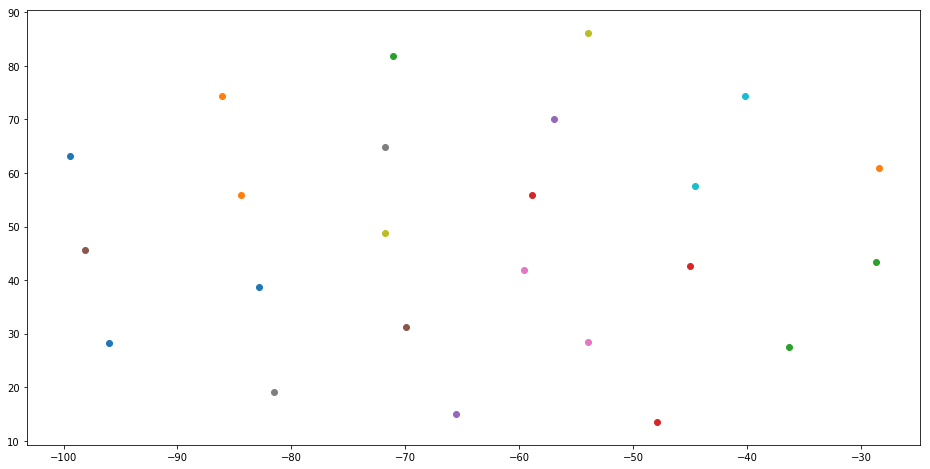

In [183]:
def showPlot(points):
    plt.rcParams['figure.figsize'] = (16, 8)
    for i, point in enumerate(points):
        plt.scatter(point[0], point[1])

show_2Dplot(tsne_results)